In [1]:
using Logging
global_logger(ConsoleLogger())

## Load the code

include("N_point_NCG_PEP.jl");

In [2]:
## Load functions

function array_ρ_PRP(μ_array, L)

	array_ρ_PRP_array = zeros(length(μ_array))

	for i in eachindex(μ_array)
		μ = μ_array[i]
		array_ρ_PRP_array[i] = (L^2-μ^2)^2/(L^2+μ^2)^2
	end

	return array_ρ_PRP_array

end

function array_ρ_gradient_descent_with_exact_line_search(μ_array, L)

	ρ_GD_ELS_array = zeros(length(μ_array))

	for i in eachindex(μ_array)
		μ = μ_array[i]
		ρ_GD_ELS_array[i] = (L-μ)^2/(L+μ)^2
	end

	return ρ_GD_ELS_array

end

## Load the Julia packages

using JLD2

In [2]:
## Load data for N=2

cd("Saved_Output_Files")

readdir()

10-element Vector{String}:
 ".DS_Store"
 "Output_Default_PRP_N_eq_2_μ_array_custom_Final.jld2"
 "Output_Default_PRP_N_eq_3_μ_array_custom_Final.jld2"
 "Output_Default_PRP_N_eq_4_μ_array_custom_Final.jld2"
 "Output_Restarted_FR_N_eq_2_μ_array_custom_Final.jld2"
 "Output_Restarted_FR_N_eq_3_μ_array_custom_Final.jld2"
 "Output_Restarted_FR_N_eq_4_μ_array_custom_Final.jld2"
 "Output_Restarted_PRP_N_eq_2_μ_array_custom_Final.jld2"
 "Output_Restarted_PRP_N_eq_3_μ_array_custom_Final.jld2"
 "Output_Restarted_PRP_N_eq_4_μ_array_custom_Final.jld2"

In [3]:
dict_output_N_2 = load("Output_Default_PRP_N_eq_2_μ_array_custom_Final.jld2")

Dict{String, Any} with 14 entries:
  "μ_array"                     => [0.001, 0.005, 0.01, 0.02, 0.03, 0.04, 0.05,…
  "N_array"                     => 2:2
  "dict_β_LB"                   => Dict{Any, Any}((0.09, 2)=>1-dimensional Dens…
  "dict_G_LB"                   => Dict{Any, Any}((0.09, 2)=>[20.9289 1.95001 ……
  "dict_G"                      => Dict{Any, Any}((0.09, 2)=>[0.648186 0.196403…
  "array_contraction_factor"    => [0.999839; 0.998019; … ; 0.00370873; 0.00154…
  "dict_worst_case_functions"   => Dict{Any, Any}((0.09, 2)=>worst_case_functio…
  "dict_Ft"                     => Dict{Any, Any}((0.09, 2)=>[1.0, 0.918563, 0.…
  "dict_contraction_factor_LB"  => Dict{Any, Any}((0.09, 2)=>0.821754, (0.08, 2…
  "dict_γ_LB"                   => Dict{Any, Any}((0.09, 2)=>1-dimensional Dens…
  "dict_Ft_LB"                  => Dict{Any, Any}((0.09, 2)=>[1.0, 0.918553, 0.…
  "dict_β"                      => Dict{Any, Any}((0.09, 2)=>1-dimensional Dens…
  "array_contraction_factor_LB" => 

In [4]:
μ_array_N_2 = dict_output_N_2["μ_array"]

array_contraction_factor_N_2 = dict_output_N_2["array_contraction_factor"]

array_contraction_factor_LB_N_2 = dict_output_N_2["array_contraction_factor_LB"]

array_contraction_factor_N_2_normalized= (array_contraction_factor_N_2 .^(1/2))[:,1];

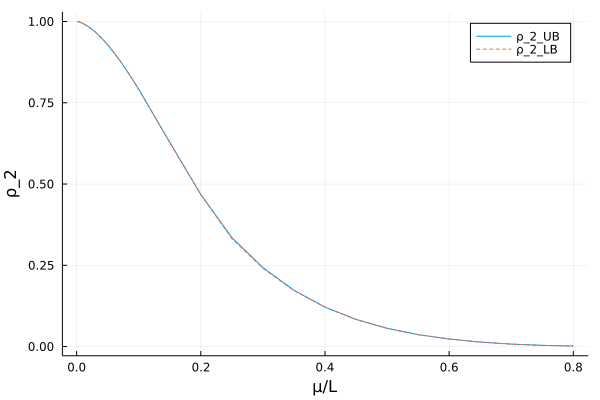

In [5]:
using Plots

plot()
plot(μ_array_N_2, [array_contraction_factor_N_2 array_contraction_factor_LB_N_2], label = ["ρ_2_UB" "ρ_2_LB"], linestyle = [:solid :dash])
xlabel!("μ/L")
ylabel!("ρ_2")        

In [6]:
dict_worst_case_functions = dict_output_N_2["dict_worst_case_functions"]
dict_contraction_factor = dict_output_N_2["dict_contraction_factor"]
dict_contraction_factor_LB = dict_output_N_2["dict_contraction_factor_LB"]
dict_contraction_factor_UB = dict_output_N_2["dict_contraction_factor"]
dict_β_LB = dict_output_N_2["dict_β_LB"] # NCG stepsizes 
dict_γ_LB = dict_output_N_2["dict_γ_LB"] # line-search stepsizes;

Dict{Any, Any} with 26 entries:
  (0.09, 2)  => 1-dimensional DenseAxisArray{Float64,1,...} with index sets:…
  (0.08, 2)  => 1-dimensional DenseAxisArray{Float64,1,...} with index sets:…
  (0.25, 2)  => 1-dimensional DenseAxisArray{Float64,1,...} with index sets:…
  (0.35, 2)  => 1-dimensional DenseAxisArray{Float64,1,...} with index sets:…
  (0.7, 2)   => 1-dimensional DenseAxisArray{Float64,1,...} with index sets:…
  (0.15, 2)  => 1-dimensional DenseAxisArray{Float64,1,...} with index sets:…
  (0.01, 2)  => 1-dimensional DenseAxisArray{Float64,1,...} with index sets:…
  (0.2, 2)   => 1-dimensional DenseAxisArray{Float64,1,...} with index sets:…
  (0.07, 2)  => 1-dimensional DenseAxisArray{Float64,1,...} with index sets:…
  (0.001, 2) => 1-dimensional DenseAxisArray{Float64,1,...} with index sets:…
  (0.65, 2)  => 1-dimensional DenseAxisArray{Float64,1,...} with index sets:…
  (0.06, 2)  => 1-dimensional DenseAxisArray{Float64,1,...} with index sets:…
  (0.05, 2)  => 1-dimensional De

In [7]:
μ_N = (0.5, 2)

(0.5, 2)

In [8]:
wf = dict_worst_case_functions[μ_N] # So this will be the bad function's {x_i, g_i, f_i}_{i} list for the (μ, N)

worst_case_function([0.0 1.6726170315817679 0.3541094756632799 -0.14081721268845704; 0.0 0.0 -0.8103131535085707 -0.3229554554238826; … ; 0.0 0.0 0.00022247725956548836 0.0002447954580981711; 0.0 0.0 0.0 0.0], [0.0 1.0873354335572303 0.30336225318894505 -0.15856691664957037; 0.0 0.23721168348134353 -0.47566993042718697 -0.20551930565372273; … ; 0.0 0.0 0.0 0.00016656411164990036; 0.0 0.0 0.0 0.0], [0.0, 0.9999999276664239, 0.2673530229212107, 0.056103782765843734])

In [9]:
x_array = wf.x_array 
# first column of x_array = x_⋆, 
# second column of x_array = x_0
# third column of x_array = x_1 and so on

5×4 OffsetArray(::Matrix{Float64}, 1:5, -1:2) with eltype Float64 with indices 1:5×-1:2:
 0.0  1.67262   0.354109     -0.140817
 0.0  0.0      -0.810313     -0.322955
 0.0  0.0       0.0775561    -0.138845
 0.0  0.0       0.000222477   0.000244795
 0.0  0.0       0.0           0.0

In [10]:
g_array = wf.g_array
# first column of g_array = g_⋆, 
# second column of g_array = g_0
# third column of g_array = g_1 and so on

5×4 OffsetArray(::Matrix{Float64}, 1:5, -1:2) with eltype Float64 with indices 1:5×-1:2:
 0.0  1.08734    0.303362  -0.158567
 0.0  0.237212  -0.47567   -0.205519
 0.0  0.0        0.187527  -0.100196
 0.0  0.0        0.0        0.000166564
 0.0  0.0        0.0        0.0

In [11]:
f_array = wf.f_array
# first column of f_array = f_⋆, 
# second column of f_array = f_0
# third column of f_array = f_1 and so on

4-element OffsetArray(::Vector{Float64}, -1:2) with eltype Float64 with indices -1:2:
 0.0
 0.9999999276664239
 0.2673530229212107
 0.056103782765843734

In [12]:
ρ_LB = dict_contraction_factor_LB[μ_N]

0.056103782765843734

In [13]:
ρ_UB = dict_contraction_factor_UB[μ_N]

0.056124266554459026

In [14]:
beta = [dict_β_LB[μ_N].data; 0]

2-element Vector{Float64}:
 0.11015521120443346
 0.0

In [15]:
gamma = dict_γ_LB[μ_N].data

2-element Vector{Float64}:
 1.3127063659282785
 1.1954627659433608

In [16]:
println( "mu = ", μ_N[1])
println( "n = ", μ_N[2])
println( "beta = ", beta)
println( "gamma = ", gamma)
println( "rho_LB = ", ρ_LB)
println( "rho_UB = ", ρ_UB)

mu = 0.5
n = 2
beta = [0.11015521120443346, 0.0]
gamma = [1.3127063659282785, 1.1954627659433608]
rho_LB = 0.056103782765843734
rho_UB = 0.056124266554459026
